In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
!pip install -q gdown


!gdown --id 1KPw56B4kYr5zaPb_edTgyMcFSzp6soGq



/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KPw56B4kYr5zaPb_edTgyMcFSzp6soGq
To: /content/Occupancy.csv
100% 1.38M/1.38M [00:00<00:00, 30.8MB/s]


In [ ]:
df = pd.read_csv('Occupancy.csv')

In [ ]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


# Remove duplicate rows

#  Dudi: Load and Inspect the Data

In [ ]:
# סיכום סטטיסטי ראשוני
summary_all = df.describe(include='all')
print(summary_all)

# מספר שורות ועמודות
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


                       date   Temperature      Humidity         Light  \
count                 20560  20560.000000  20560.000000  20560.000000   
unique                20560           NaN           NaN           NaN   
top     2015-02-18 09:03:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
mean                    NaN     20.906212     27.655925    130.756622   
std                     NaN      1.055315      4.982154    210.430875   
min                     NaN     19.000000     16.745000      0.000000   
25%                     NaN     20.200000     24.500000      0.000000   
50%                     NaN     20.700000     27.290000      0.000000   
75%                     NaN     21.525000     31.290000    301.000000   
max                     NaN     24.408333     39.500000   1697.250000   

                 CO2  HumidityRatio     Occupancy  
count   20560.000000   20560.000000  20560.000000  
unique           Na

# Shavit: Data Description and Data Types

In [ ]:
# הצגה מהירה של הנתונים
print("First few rows:")
print(df.head())

# הצגת מידע על הדאטה פריים
print("Data info:")
print(df.info())

# הסרת ערכים חסרים
df.dropna(inplace=True)

# הסרת כפילויות
df.drop_duplicates(inplace=True)

# בדיקת סוגי משתנים
data_types = df.dtypes
print("Data types:")
print(data_types)

# המרת עמודת התאריך לפורמט datetime
df['date'] = pd.to_datetime(df['date'])
print("After date conversion:")
print(df[['date']].head())


First few rows:
                  date  Temperature  Humidity       Light         CO2  \
0  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
1  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
2  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
3  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
4  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

   HumidityRatio  Occupancy  
0       0.004764          1  
1       0.004773          1  
2       0.004765          1  
3       0.004744          1  
4       0.004767          1  
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 

#  Omer: Distributions + Final Merge

In [ ]:
# עיגול ערכי טמפרטורה (לניתוח תדירויות)
df['Rounded_Temp'] = df['Temperature'].round().astype(int)


In [ ]:
# התפלגות טמפרטורה מעוגלת
print("התפלגות טמפרטורה (מעוגלת):")
print(df['Rounded_Temp'].value_counts())

# התפלגות נוכחות (Occupancy)
print("\nהתפלגות Occupancy (נוכחות):")
print(df['Occupancy'].value_counts())


התפלגות טמפרטורה (מעוגלת):
Rounded_Temp
20    7305
21    6478
22    3749
19    1280
23    1195
24     553
Name: count, dtype: int64

התפלגות Occupancy (נוכחות):
Occupancy
0    15810
1     4750
Name: count, dtype: int64


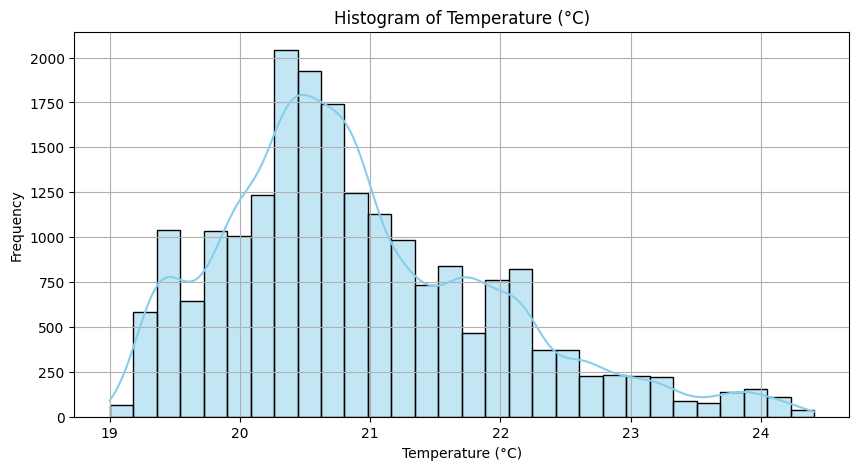

In [ ]:
# גרף – היסטוגרמה של טמפרטורה
plt.figure(figsize=(10, 5))
sns.histplot(df['Temperature'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Temperature (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


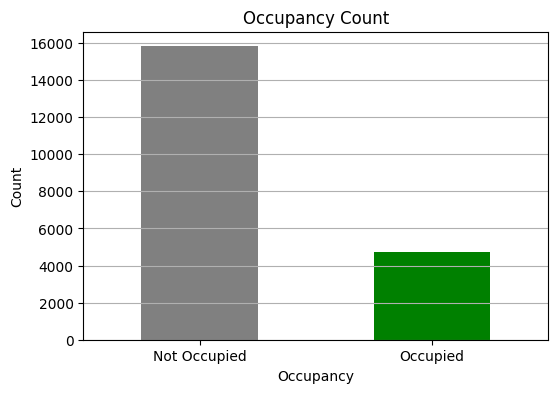

In [ ]:
# גרף – עמודות של Occupancy
plt.figure(figsize=(6, 4))
df['Occupancy'].value_counts().plot(kind='bar', color=['gray', 'green'])
plt.title("Occupancy Count")
plt.xticks([0, 1], ['Not Occupied', 'Occupied'], rotation=0)
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


# Show rows with missing values

#  Outlier Detection

Histogram  for Light column

In [ ]:
sns.set(style="whitegrid")

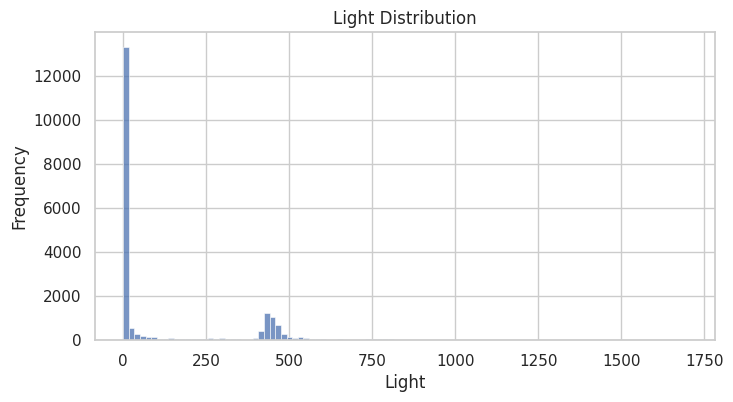

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Light'], bins=100, kde=False)
plt.title("Light Distribution")
plt.xlabel("Light")
plt.ylabel("Frequency")
plt.show()

Boxplot for Light

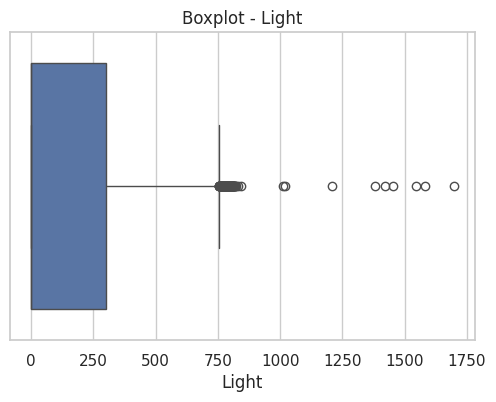

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Light'])
plt.title("Boxplot - Light")
plt.show()

Filter out outliers in Temperature

In [ ]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_temp = Q1 - 1.5 * IQR
upper_bound_temp = Q3 + 1.5 * IQR

IQR method for Temperature

In [ ]:
df = df[(df['Temperature'] >= lower_bound_temp) & (df['Temperature'] <= upper_bound_temp)]

Boxplot for Temperature

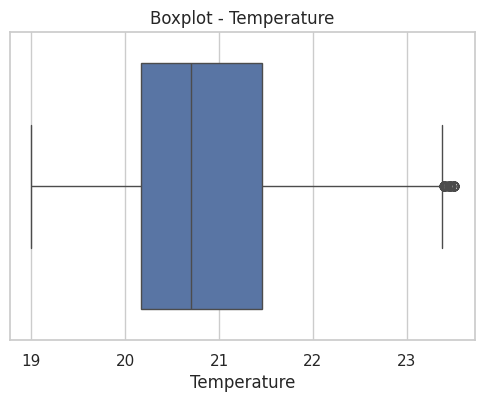

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Temperature'])
plt.title("Boxplot - Temperature")
plt.show()


Histogram for Temperature

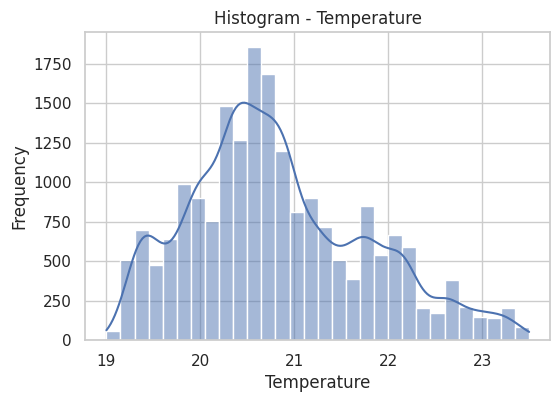

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title("Histogram - Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

Z-score method for CO2

In [ ]:
z_scores = zscore(df['CO2'])
df = df[(np.abs(z_scores) < 1.5)]

Boxplot for CO2

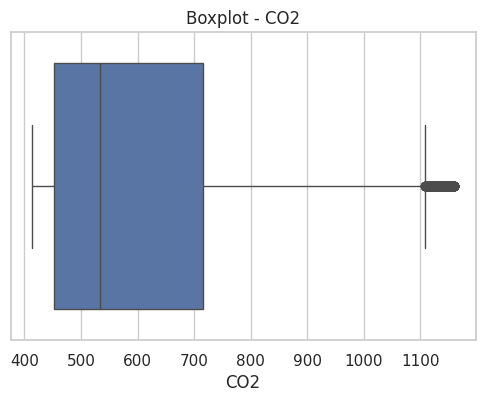

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['CO2'])
plt.title("Boxplot - CO2")
plt.show()

Histogram for CO2

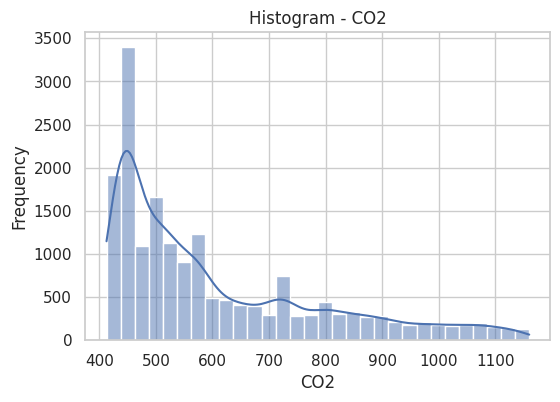

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['CO2'], bins=30, kde=True)
plt.title("Histogram - CO2")
plt.xlabel("CO2")
plt.ylabel("Frequency")
plt.show()

Histogram for Light

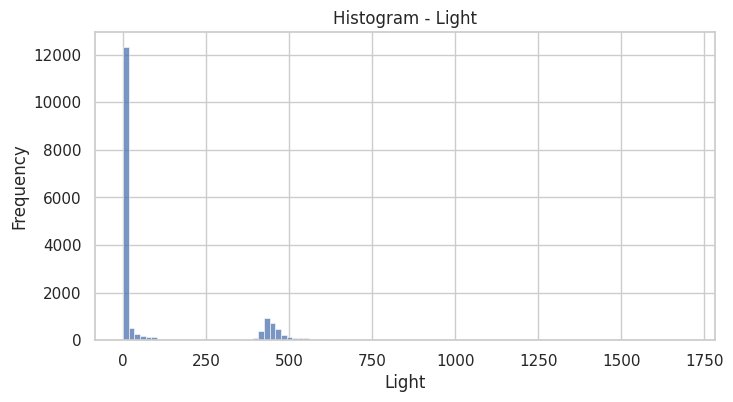

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Light'], bins=100, kde=False)
plt.title("Histogram - Light")
plt.xlabel("Light")
plt.ylabel("Frequency")
plt.show()